In [ ]:
import pandas as pd

df = pd.read_csv('/content/Q2dataset.csv')
column_names = df.columns.tolist()
print(column_names)


['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


In [ ]:
length_of_df = len(df)
print(length_of_df)


918


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

df_cleaned = df.dropna()
missing_values_after = df_cleaned.isnull().sum()
print(missing_values_after)


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
new_shape = df_cleaned.shape
print(new_shape)


(918, 12)


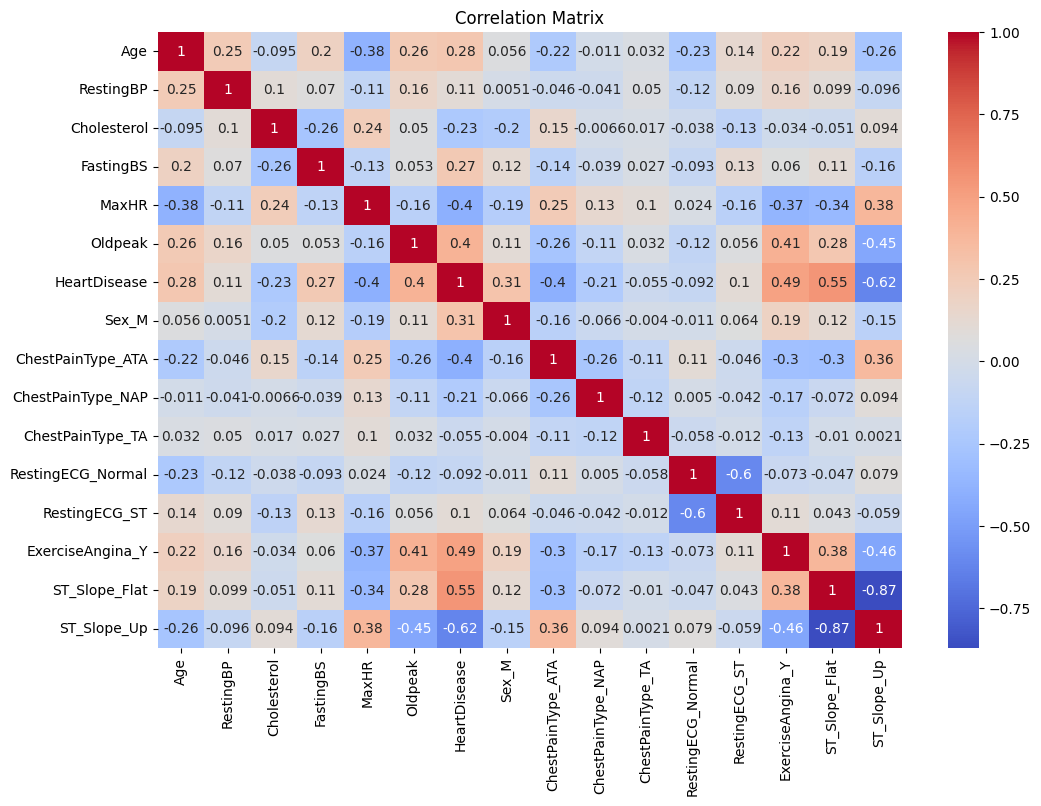

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

plt.figure(figsize=(12, 8))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


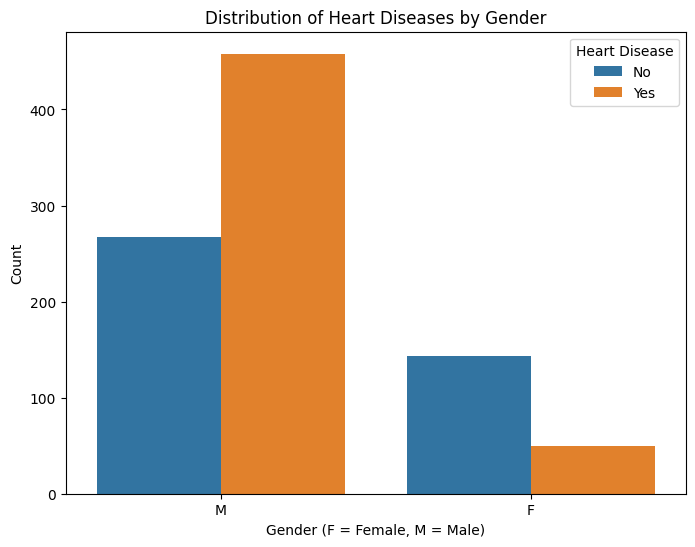

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='Sex', hue='HeartDisease')
plt.title('Distribution of Heart Diseases by Gender')
plt.xlabel('Gender (F = Female, M = Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


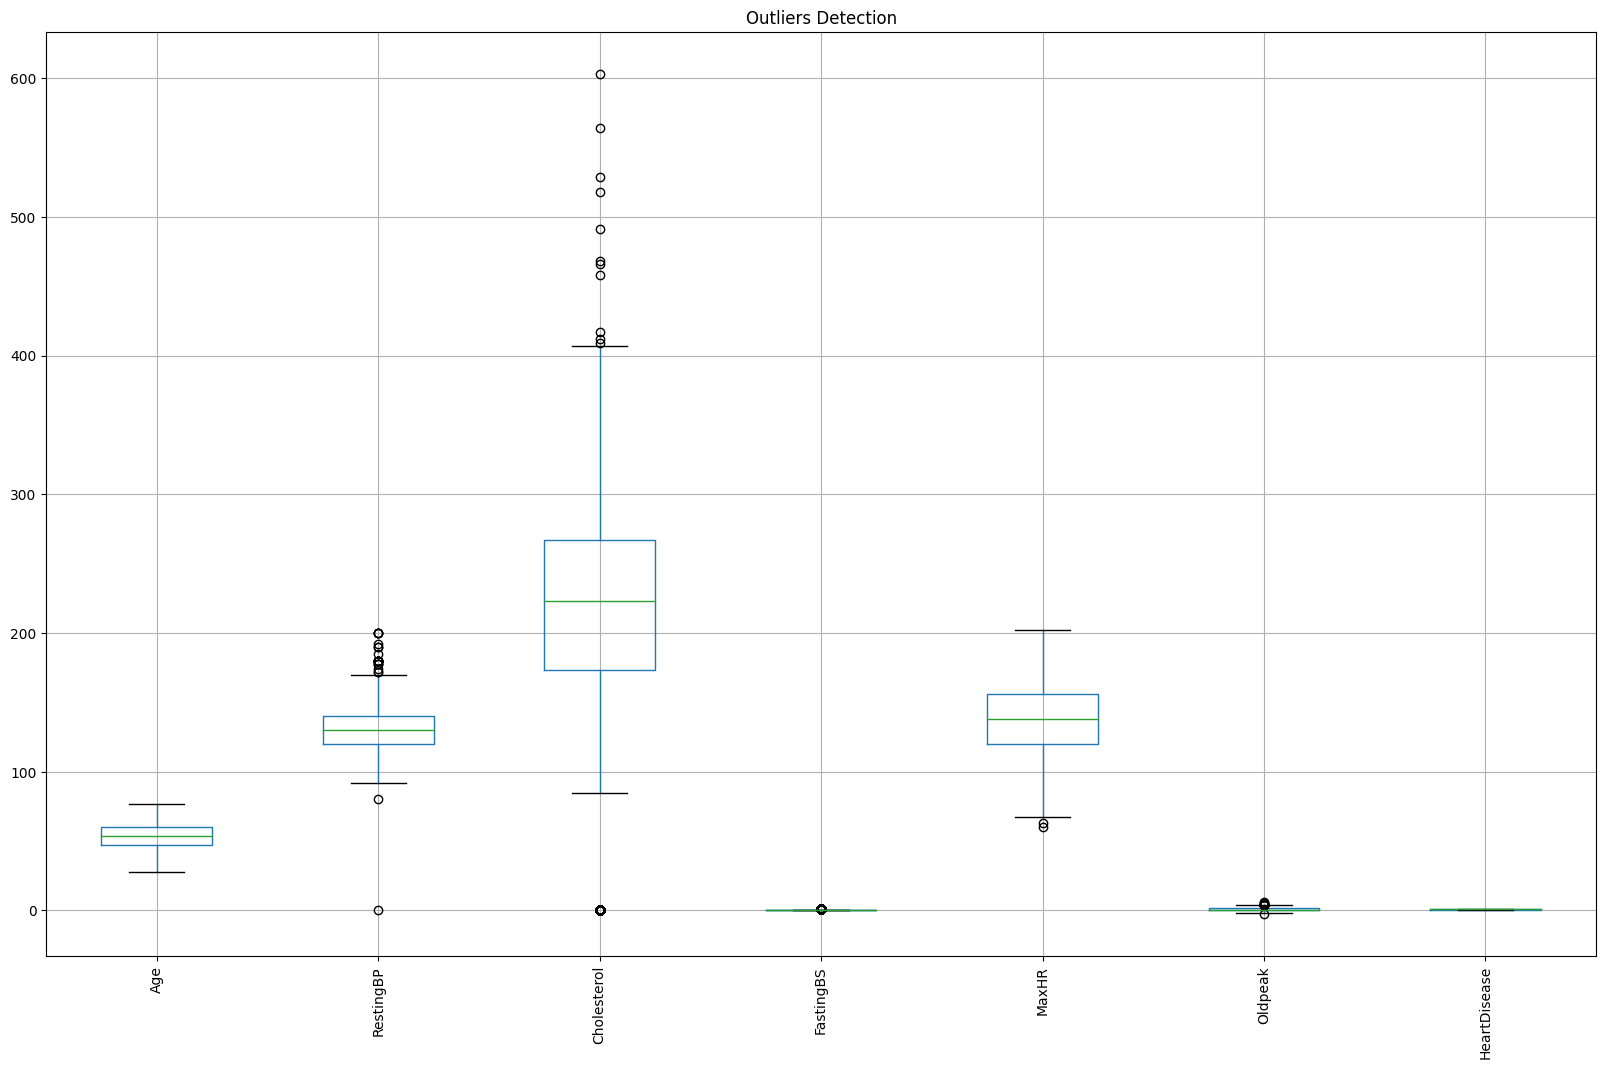

In [ ]:
plt.figure(figsize=(20, 12))
df_cleaned.boxplot()
plt.title('Outliers Detection')
plt.xticks(rotation=90)
plt.show()


In [ ]:
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.717391304347826
Confusion Matrix:
 [[ 76  36]
 [ 42 122]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.68      0.66       112
           1       0.77      0.74      0.76       164

    accuracy                           0.72       276
   macro avg       0.71      0.71      0.71       276
weighted avg       0.72      0.72      0.72       276

